# **ETL**

## CONFIGURACIÓN INICIAL

In [166]:
# descargar librerías
!pip install reverse_geocoder
!pip install seaborn

In [167]:
# importar librerías
import pandas as pd
import datetime
import reverse_geocoder as rg
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [168]:
# funcion para pasar de fecha de nacimiento a edad
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [169]:
# leer csv
df_perf_test = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/test_performance.csv')
df_perf_train = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/train_performance.csv')
df_loan_test = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/test_previous_loan.csv')
df_loan_train = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/train_previous_loan.csv')
df_dem_test = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/test_datos_demograficos.csv')
df_dem_train = pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/train_datos_demograficos.csv')

## ANEXAR DATOS DE PRÉSTAMOS ANTIGUOS Y CLIENTES

In [170]:
#adjuntar los dos csv
df_dem = df_dem_test.append(df_dem_train, ignore_index=True)
#eliminar filas que sean idénticas
df_dem.drop_duplicates(inplace = True)
#dimensiones del nuevo dataframe
df_dem.shape

C:\Users\sergi\AppData\Local\Temp/ipykernel_21388/1409091891.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dem = df_dem_test.append(df_dem_train, ignore_index=True)


(5818, 9)

In [171]:
#adjuntar los dos csv
df_loan = df_loan_test.append(df_loan_train, ignore_index=True)
#eliminar filas que sean idénticas
df_loan.drop_duplicates(inplace = True)
#dimensiones del nuevo dataframe
df_loan.shape

C:\Users\sergi\AppData\Local\Temp/ipykernel_21388/3920205185.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_loan = df_loan_test.append(df_loan_train, ignore_index=True)


(24090, 12)

## PREPARAR DATOS PRÉSTAMOS ANTIGUOS

In [172]:
# vista previa
df_loan

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
24085,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
24086,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
24087,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
24088,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


In [173]:
#pasar columnas a fecha
df_loan['firstduedate'] = pd.to_datetime(df_loan['firstduedate'])
df_loan['firstrepaiddate'] = pd.to_datetime(df_loan['firstrepaiddate'])
df_loan['firstrepaiddate'] = pd.to_datetime(df_loan['firstrepaiddate'].dt.date)

In [174]:
# guardar si se ha hecho el primer pago antes o después del plazo
df_loan['pago_plazo'] = df_loan.apply(lambda x: 1 if (x['firstduedate'] >= x['firstrepaiddate']) else -3, axis=1)

In [175]:
#nos quedamos con las columnas que importan
df_loan = df_loan[['customerid','pago_plazo']]

In [176]:
#agrupa el dataframe por cliente, obtienendo para cada uno si ha pagado en plazo o no sus prestamos
df_loan_gr = df_loan.groupby(['customerid']).sum()
df_loan_gr

,pago_plazo
customerid,
8a1088a0484472eb01484669e3ce4e0b,-3
8a1a1e7e4f707f8b014f797718316cad,0
8a1a32fc49b632520149c3b8fdf85139,3
8a1eb5ba49a682300149c3c068b806c7,4
8a1edbf14734127f0147356fdb1b1eb2,2
...,...
8a858fff5c79144c015c7bdbfc086ce1,1
8aaae7a74400b28201441c8b62514150,3
8aab10f748cf78ff0148d11fac1447a6,-3


In [177]:
# pasar la columna a binario
df_loan_gr['pagos_plazo'] = 1
df_loan_gr.loc[df_loan_gr['pago_plazo'] < 0, 'pagos_plazo'] = 0
df_loan_gr = df_loan_gr['pagos_plazo']

## ADJUNTAR TODOS LOS DATOS EN UN SOLO DATAFRAME

In [178]:
df_perf_train.shape

(4368, 10)

In [179]:
# primero se añade la información del cliente
df_train = df_perf_train.merge(df_dem, on='customerid', how='left')
#ver tamaño del nuvo df
df_train.shape

(4368, 18)

In [180]:
# se añade la información de préstamos antiguos del cliente
df_train = df_train.merge(df_loan_gr, on='customerid', how='left')
#ver tamaño del nuvo df
df_train.shape

(4368, 19)

In [181]:
# se añade la información de préstamos antiguos del referido del cliente
df_train = df_train.merge(df_loan_gr, left_on='referredby', right_on='customerid', how='left')
#ver tamaño del nuvo df
df_train.shape

(4368, 20)

In [182]:
df_train

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,pagos_plazo_x,pagos_plazo_y
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,0.0,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,1.0,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN,0.0,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad,1978-10-19 00:00:00.000000,Savings,6.981903,4.785397,EcoBank,NaN,NaN,NaN,0.0,NaN
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad,1989-12-04 00:00:00.000000,Savings,4.607358,8.460608,FCMB,NaN,Permanent,NaN,1.0,NaN
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad,1989-11-21 00:00:00.000000,Savings,3.976842,7.409129,First Bank,NaN,Permanent,NaN,0.0,NaN
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,1990-06-11 00:00:00.000000,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,NaN,1.0,1.0


## TRANSFORMACIONES INICIALES EN EL DATASET

In [183]:
# quitar columnas que no se usan
# elegir las columnas
df_train_delete = ['customerid', 'systemloanid','bank_name_clients', 'bank_branch_clients', 'creationdate']
# borrar las columnas elegidas
df_train.drop(columns = df_train_delete, inplace = True)

In [184]:
#ver tipo de datos de las columnas
df_train.dtypes

loannumber                      int64
approveddate                   object
loanamount                    float64
totaldue                      float64
termdays                        int64
referredby                     object
good_bad_flag                  object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
employment_status_clients      object
level_of_education_clients     object
pagos_plazo_x                 float64
pagos_plazo_y                 float64
dtype: object

In [185]:
# cambiar el tipo de dato de algunas columnas
#cambiar tipo de dato
df_train['totaldue'] = df_train['totaldue'].astype('int')
df_train['pagos_plazo_x'] = df_train['pagos_plazo_x'].astype('Int64')
df_train['pagos_plazo_y'] = df_train['pagos_plazo_x'].astype('Int64')
#pasar columna a fecha
df_train['birthdate'] = pd.to_datetime(df_train['birthdate'])
df_train['approveddate'] = pd.to_datetime(df_train['approveddate'])

In [186]:
# ver registros nulos en las columnas
print(df_train.isnull().sum())

loannumber                       0
approveddate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3781
good_bad_flag                    0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
employment_status_clients      657
level_of_education_clients    3763
pagos_plazo_x                    9
pagos_plazo_y                    9
dtype: int64


In [187]:
# aparecen algunos 9 registros donde los clientes no tienen datos de préstamos antiguos
# sin embargo, la columna loannumber indica lo contrario
df_train['loannumber'].min()

2

In [188]:
# al ser tan pocos registros, se opta por borrarlos
df_train.dropna(subset=['pagos_plazo_x'], inplace = True)

In [189]:
df_train

,loannumber,approveddate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,level_of_education_clients,pagos_plazo_x,pagos_plazo_y
0,12,2017-07-25 08:22:56,30000.0,34500,30,NaN,Good,1972-01-15,Other,3.432010,6.433055,Permanent,Post-Graduate,0,0
2,7,2017-07-06 14:52:57,20000.0,22250,15,NaN,Good,1984-09-18,Other,11.139350,10.292041,Permanent,NaN,1,1
3,3,2017-07-27 19:00:41,10000.0,11500,15,NaN,Good,1977-10-10,Savings,3.985770,7.491708,Permanent,NaN,0,0
4,9,2017-07-03 23:42:45,40000.0,44000,30,NaN,Good,1986-09-07,Other,7.457913,9.076574,Permanent,Primary,1,1
5,8,2017-07-19 21:46:24,30000.0,39000,60,NaN,Good,1972-12-22,Savings,3.311981,6.633271,Permanent,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2,2017-07-30 09:19:42,10000.0,13000,30,NaN,Bad,1978-10-19,Savings,6.981903,4.785397,NaN,NaN,0,0
4364,2,2017-07-27 15:35:47,10000.0,13000,30,NaN,Bad,1989-12-04,Savings,4.607358,8.460608,Permanent,NaN,1,1
4365,3,2017-07-25 16:25:57,10000.0,11500,15,NaN,Bad,1989-11-21,Savings,3.976842,7.409129,Permanent,NaN,0,0
4366,2,2017-07-14 13:50:27,10000.0,13000,30,8a858eda5c8863ff015c9dead65807bb,Bad,1990-06-11,Savings,3.986089,7.386796,Permanent,NaN,1,1


## TRANSFORMACIONES EN COLUMNAS

### Histórico de pagos del cliente

- 0: El cliente tiene un mal historial de pagos
- 1: El cliente tiene un buen historial de pagos

In [190]:
df_train.rename(columns={'pagos_plazo_x': 'historial'}, inplace = True)


### Referido

- 0: El cliente ha sido referido por un cliente con un mal historial de pagos
- 1: El cliente no ha sido referido
- 2: El cliente ha sido referido por un cliente sin historial de pagos
- 3: El cliente ha sido referido por un cliente con un buen historial de pagos

In [191]:
df_train['referido'] = 0
df_train.loc[df_train['referredby'].isnull(), 'referido'] = 1
df_train.loc[(df_train['referredby'].notnull()) & (df_train['pagos_plazo_y'].isnull()), 'referido'] = 2
df_train.loc[(df_train['referredby'].notnull()) & (df_train['pagos_plazo_y'] == 1), 'referido'] = 3
# borrar columnas que ya no se usan
df_train.drop(columns = ['referredby', 'pagos_plazo_y'], inplace = True)

### Columna a predecir

In [192]:
df_train['flag'] = 0
df_train.loc[df_train['good_bad_flag'] == 'Good', 'flag'] = 1
#convertimos la columna a int
df_train['flag'] = df_train['flag'].astype('Int64')
# quitar la columna que ya no se usa
df_train.drop(columns = ['good_bad_flag'], inplace = True)

### Edad

In [193]:
# pasar de fecha de nacimiento a edad
df_train['age'] = df_train['birthdate'].apply(lambda x: from_dob_to_age(x)).astype('Int64')
# quitar la columna que ya no se usa
df_train.drop(columns = ['birthdate'], inplace = True)

### Parte del mes del pago

- 0: Final de mes
- 1: Mitad de mes
- 2: Principio de mes

In [194]:
# a partir de approveddate y termdays, se crea la columna firstduedate
df_train['firstduedate'] = df_train.apply(lambda x: x['approveddate'] + pd.DateOffset(15) if x['termdays'] == 15 else x['approveddate'] + pd.DateOffset(30), axis=1)


In [195]:
# se divide en si el dia de pago es a principio de mes, a mitad o a final
df_train.loc[df_train['firstduedate'].dt.day <= 10, 'parte_mes_pago'] = 3
df_train.loc[(df_train['firstduedate'].dt.day > 10) & (df_train['firstduedate'].dt.day <= 20), 'parte_mes_pago'] = 2
df_train.loc[df_train['firstduedate'].dt.day > 20, 'parte_mes_pago'] = 1
#cambiar tipo de dato
df_train['parte_mes_pago'] = df_train['parte_mes_pago'].astype('Int64')
# borrar columnas que ya no se usan
df_train.drop(columns = ['approveddate', 'firstduedate'], inplace = True)

### Deuda por día

In [196]:
df_train['due_per_day'] = df_train.apply(lambda x: x['totaldue'] / x['termdays'], axis=1)
df_train['due_per_day'] = df_train['due_per_day'].astype('int')

### Interés

In [197]:
df_train['interes'] = df_train.apply(lambda x: (x['totaldue'] - x['loanamount']) / x['termdays'], axis=1)
# borrar columnas que ya no se usan
df_train.drop(columns = ['termdays', 'totaldue', 'loanamount'], inplace = True)

### Tipo de cuenta del banco

Dummies para cada tipo

In [198]:
#ver distribución
df_train['bank_account_type'].value_counts(dropna = False)

Savings    3409
Other       886
Current      64
Name: bank_account_type, dtype: int64

In [199]:
# Inicialmente se decide hacer un label encoding, pero finalmente se usa un one hot encoding
'''
df_train['account_type'] = 0
df_train.loc[df_train['bank_account_type'] == 'Current', 'account_type'] = 1
df_train.loc[df_train['bank_account_type'] == 'Savings', 'account_type'] = 2
#borrar columnas que ya no se usa
df_train.drop(columns = ['bank_account_type'], inplace = True)
'''

"\ndf_train['account_type'] = 0\ndf_train.loc[df_train['bank_account_type'] == 'Current', 'account_type'] = 1\ndf_train.loc[df_train['bank_account_type'] == 'Savings', 'account_type'] = 2\n#borrar columnas que ya no se usa\ndf_train.drop(columns = ['bank_account_type'], inplace = True)\n"

In [200]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['bank_account_type'], prefix='bank_account_type')],join='inner',axis=1)
df_train.drop(['bank_account_type'],axis=1, inplace=True)
df_train

,loannumber,longitude_gps,latitude_gps,employment_status_clients,level_of_education_clients,historial,referido,flag,age,parte_mes_pago,due_per_day,interes,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings
0,12,3.432010,6.433055,Permanent,Post-Graduate,0,1,1,50,1,1150,150.000000,0,1,0
2,7,11.139350,10.292041,Permanent,NaN,1,1,1,37,1,1483,150.000000,0,1,0
3,3,3.985770,7.491708,Permanent,NaN,0,1,1,44,2,766,100.000000,0,0,1
4,9,7.457913,9.076574,Permanent,Primary,1,1,1,35,3,1466,133.333333,0,1,0
5,8,3.311981,6.633271,Permanent,NaN,1,1,1,49,2,650,150.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,2,6.981903,4.785397,NaN,NaN,0,1,0,43,1,433,100.000000,0,0,1
4364,2,4.607358,8.460608,Permanent,NaN,1,1,0,32,1,433,100.000000,0,0,1
4365,3,3.976842,7.409129,Permanent,NaN,0,1,0,32,3,766,100.000000,0,0,1
4366,2,3.986089,7.386796,Permanent,NaN,1,3,0,31,2,433,100.000000,0,0,1


In [201]:
# Cambiar nombre de las columnas
cambios_nombre = {'bank_account_type_Current':'cuenta_corriente', 'bank_account_type_Other':'cuenta_otra', 'bank_account_type_Savings':'cuenta_ahorro'}
df_train.rename(columns = cambios_nombre, inplace = True)

### Localización

A partir de la localización se ha sacado el país. Sin embargo, se ha visto que la mayoría de datos son del mismo país, y no ofrece valor significante

In [157]:
# Después
'''
df_train['pais'] = df_train.apply(lambda x: rg.search((x['latitude_gps'], x['longitude_gps']))[0]['cc'], axis=1)
# borrar columnas que ya no se usan
df_train.drop(columns = ['latitude_gps', 'longitude_gps'], inplace = True)
'''

"\ndf_train['pais'] = df_train.apply(lambda x: rg.search((x['latitude_gps'], x['longitude_gps']))[0]['cc'], axis=1)\n# borrar columnas que ya no se usan\ndf_train.drop(columns = ['latitude_gps', 'longitude_gps'], inplace = True)\n"

In [158]:
# ver distribución de la columna
'''
df_train['pais'].value_counts(dropna = False)
'''

"\ndf_train['pais'].value_counts(dropna = False)\n"

In [159]:
# borrar columnas que ya no se usan
df_train.drop(columns = ['latitude_gps', 'longitude_gps'], inplace = True)

### Educación

- 0: NsNc
- 1: Primary or Secondary
- 2: Graduate
- 3: Post-Graduate

In [160]:
## transform a value inside a column to a separate boolean column
df_train['education'] = 0
df_train.loc[df_train['level_of_education_clients'] == 'Primary', 'education'] = 1
df_train.loc[df_train['level_of_education_clients'] == 'Secondary', 'education'] = 1
df_train.loc[df_train['level_of_education_clients'] == 'Graduate', 'education'] = 2
df_train.loc[df_train['level_of_education_clients'] == 'Post-Graduate', 'education'] = 3
#convertimos la columna a int
df_train['education'] = df_train['education'].astype('Int64')
# borrar columnas que ya no se usa
df_train.drop(columns = ['level_of_education_clients'], inplace = True)

### Ocupación

- 0: Low Income: Retired, Unemployed, Student
- 1: NsNc  
- 2: High income: Permanent, Self-Employed, Contract

In [161]:
## transform a value inside a column to a separate boolean column
df_train['employment'] = 1
df_train.loc[df_train['employment_status_clients'] == 'Retired', 'employment'] = 0
df_train.loc[df_train['employment_status_clients'] == 'Unemployed', 'employment'] = 0
df_train.loc[df_train['employment_status_clients'] == 'Student', 'employment'] = 0
df_train.loc[df_train['employment_status_clients'] == 'Permanent', 'employment'] = 2
df_train.loc[df_train['employment_status_clients'] == 'Self-Employed', 'employment'] = 2
df_train.loc[df_train['employment_status_clients'] == 'Contract', 'employment'] = 2
#convertimos la columna a int
df_train['employment'] = df_train['employment'].astype('Int64')
# borrar columnas que ya no se usa
df_train.drop(columns = ['employment_status_clients'], inplace = True)

## EXPLORATORY DATA ANALYSIS

In [162]:
# ver lista de correlaciones por orden respecto a la columna flag
df_train.corr()['flag'].abs().sort_values(ascending=False)

flag                1.000000
historial           0.259103
due_per_day         0.125954
cuenta_ahorro       0.092672
loannumber          0.090276
referido            0.086199
cuenta_otra         0.085495
parte_mes_pago      0.078748
employment          0.067204
interes             0.062601
age                 0.056257
cuenta_corriente    0.032045
education           0.016182
Name: flag, dtype: float64

Después de ver que la correlación entre la educación y la columna a predecir es tan baja y que hay tantos valores vacíos, se decide prescindir de esta columna

In [163]:
df_train.drop(columns = ['education'], inplace = True)

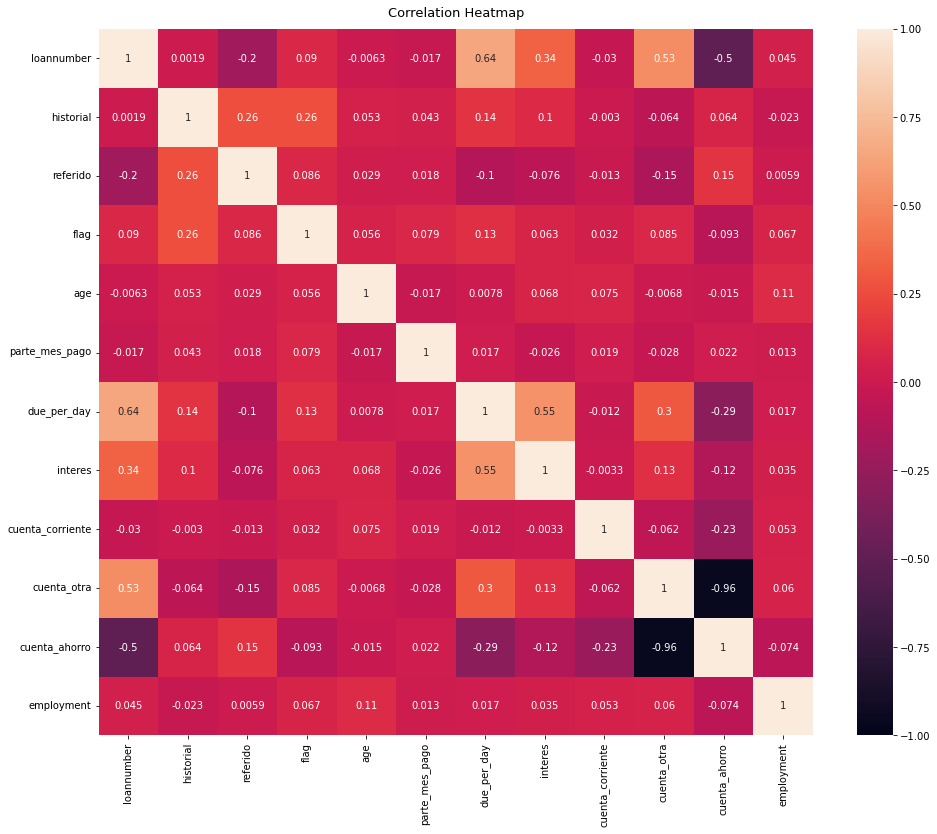

In [164]:
# mostrar un mapa de calor con la correlacion entre variables
plt.figure(figsize=(16, 13))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
hmp = heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12);
hmp = hmp.get_figure()

## GUARDAR CSV

In [165]:
# df a csv
df_train.to_csv(r'../datasets/own_data/train.csv', index = False)